# K - Means Clustering

### What is K - Means Clustering?
- K - means clustering has a clear goal, separate the data in such a way so that we have the data of interest inside the same cluster with similar points contained in there as well, while data points from different clusters are as dissimilar as possible.

- Each cluster is represented by its center (centroid), which corresponds to the arithmetic mean of data points assigned to the cluster.


![alt text](https://miro.medium.com/max/841/1*T5sbEklMd_2vTQNwQluWIA.png)

### Pros and Cons
Pros
- K - Means Clustering has linear time complexity and it can be used with large datasets conveniently.

- K - Means Clustering works perfectly fine with unlabeled data.

- K - Means Clustering returns clusters which can be easily interpreted and even visualized. This simplicity makes it highly useful in some cases when you need a quick overview of the data.

Cons
- One of the inconsistencies is that results will differ based due to random centroid initialization.

- Generates spherical clusters. So, if you have overlapping clusters or arbitrary shapes K-Means won't be able to cluster those.

- Will include every data sample in the clusters it generates. This means, if you would like to exclude outliers or certain sample groups it won't be possible with K-Means algorithm.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples = 5000, centers = 4, cluster_std = 4, n_features = 2, random_state = 42)


In [4]:

def colors(y):
    if y == 0:
        return "yellow"
    elif y == 1:
        return "cyan"
    elif y == 2:
        return "purple"
    else:
        return "blue"

c = [colors(label) for label in y]

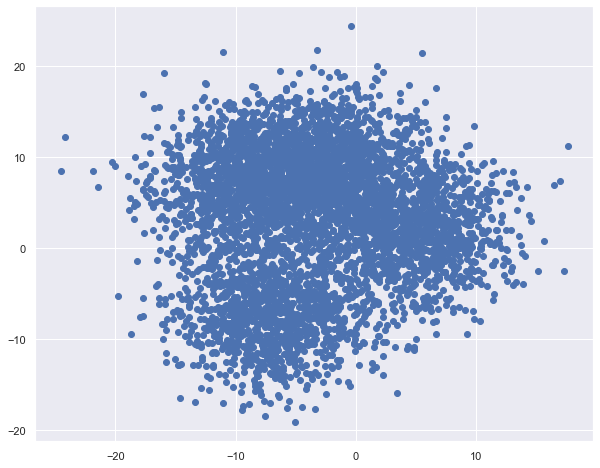

In [5]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

A centroid is a data point that represents the center of the cluster (the mean), and it might not necessarily be a member of the dataset. This way, the algorithm works through an iterative process until each data point is closer to its own cluster’s centroid than to other clusters’ centroids, minimizing intra-cluster distance at each step. 

In [12]:
centers = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

Since this is randoom this will change everytime you run the cell up above to assign the colors to the different clusters.

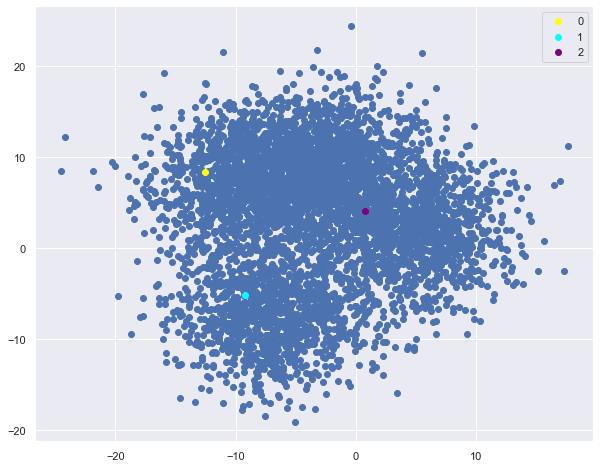

In [13]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "yellow", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "cyan", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "purple", label = centers[2][2])
plt.legend()
plt.show()

In [14]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

In [15]:
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

In [16]:
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

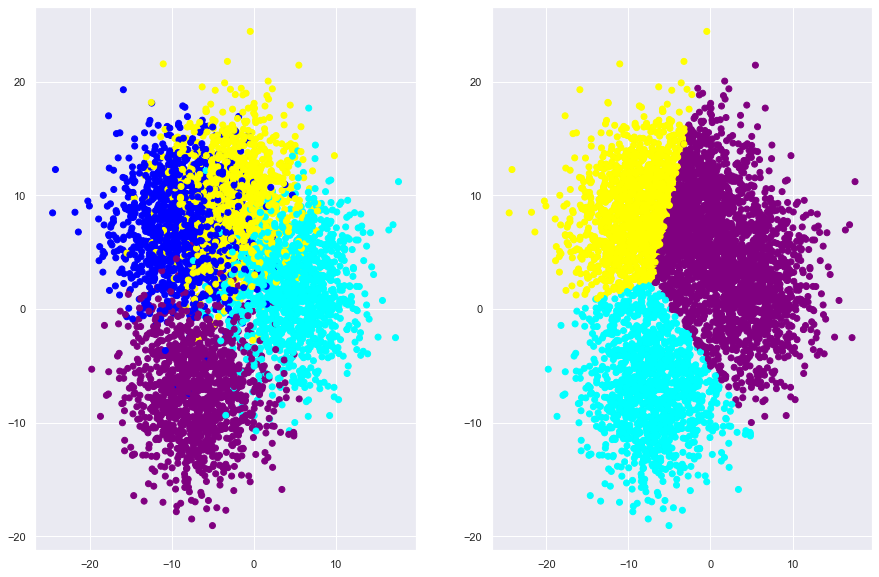

In [17]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "yellow", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "cyan", label = centers[1][2])
ax2.scatter([centers[2][0]], [centers[2][1]], color = "purple", label = centers[2][2])

plt.show()

In [18]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]
        

In [19]:
new_centers = update_centers(X, centers)

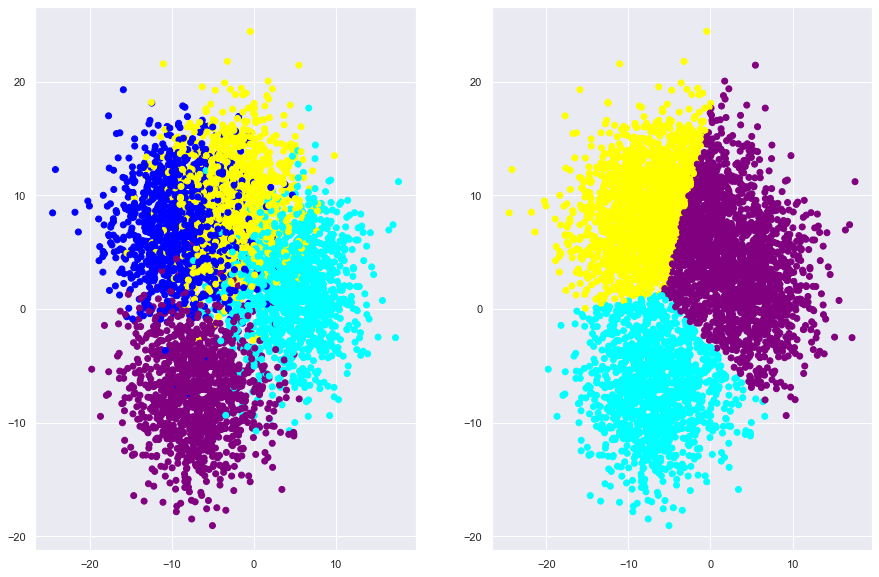

In [20]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()


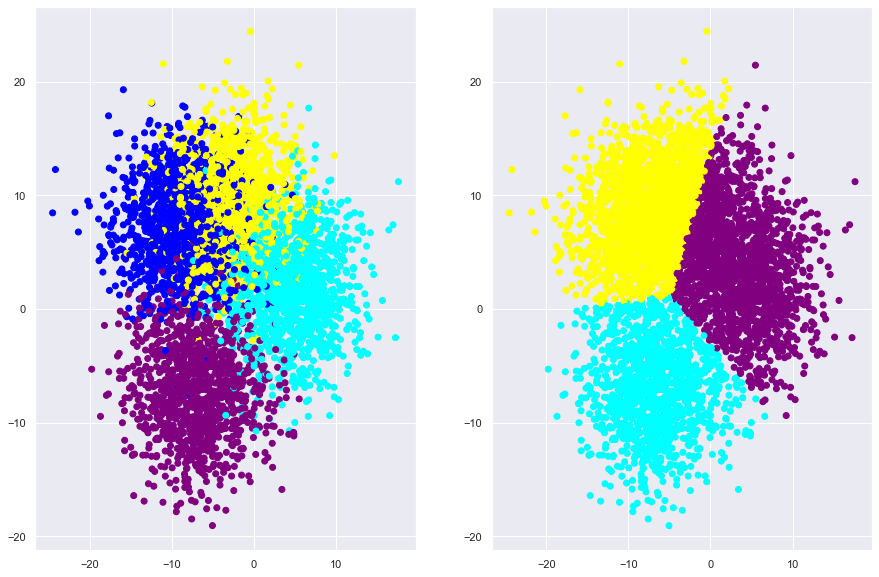

In [21]:
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

As you can see our cluster gets a little better each time.

In [22]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

In [23]:
centers = k_means_clustering(X, 2)

Originally we just separated the data into three different clusters, now we will be separatung the data into two clusters now.

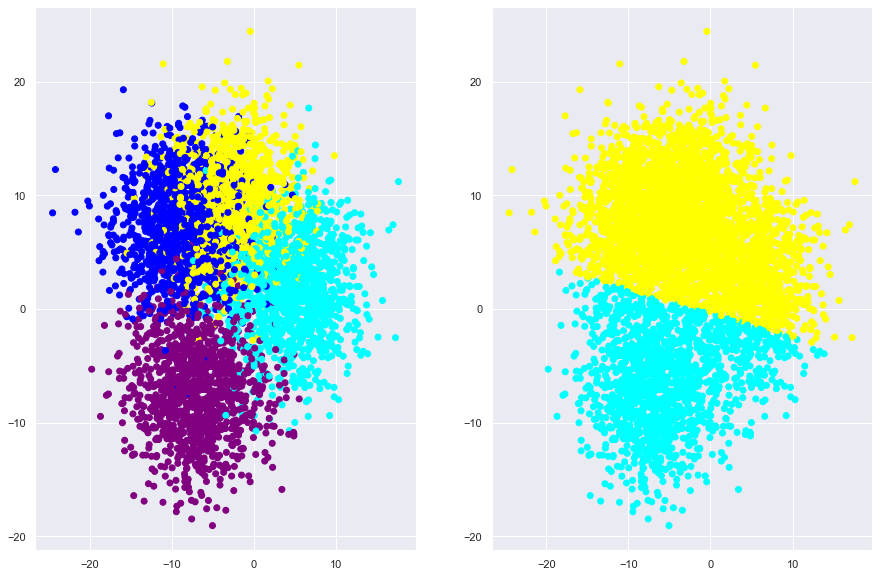

In [24]:
centers = k_means_clustering(X, 2)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

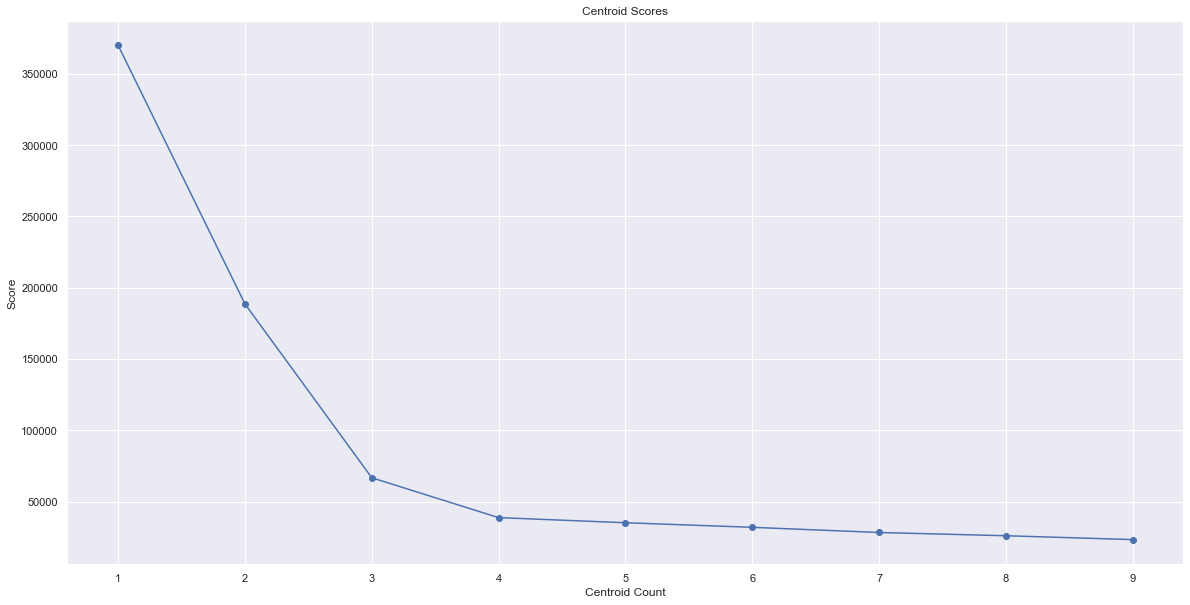

In [25]:
# Create dataset
X, y = make_blobs(n_samples = 5000, centers = 4, cluster_std = 2, random_state = 42)
all_score = []

for i in range (1, 10):
    km = KMeans(n_clusters=i, init='random')
    km.fit(X)
    all_score.append(-km.score(X))

plt.figure(figsize=(20,10))
plt.plot(range(1,10), all_score)
plt.scatter(range(1,10), all_score)
plt.xlabel('Centroid Count')
plt.ylabel('Score')
plt.title('Centroid Scores')
plt.show()